<a href="https://colab.research.google.com/github/Mennakurdi/fraud_detection_project/blob/menna-branch/notebooks/01_data_exploration_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [4]:
import pandas as pd

bene = pd.read_csv('/content/Train_Beneficiarydata-1542865627584.csv')
inpatient = pd.read_csv('/content/Train_Inpatientdata-1542865627584.csv')
outpatient = pd.read_csv('/content/Train_Outpatientdata-1542865627584.csv')
labels = pd.read_csv('/content/Train-1542865627584.csv')


In [5]:
# ============================================================
# Cell 3 – Quick structure check
# ============================================================
print("Beneficiary data:")
print(bene.info(), "\n")

print("Inpatient data:")
print(inpatient.info(), "\n")

print("Outpatient data:")
print(outpatient.info(), "\n")

print("Labels:")
print(labels.info(), "\n")

print("Head of labels:")
display(labels.head())


Beneficiary data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [6]:
print("Providers in inpatient: ", inpatient['Provider'].nunique())
print("Providers in outpatient:", outpatient['Provider'].nunique())
print("Providers in labels:    ", labels['Provider'].nunique())

print("Overlap between inpatient & labels:",
      len(set(inpatient['Provider']).intersection(set(labels['Provider']))))

print("Overlap between outpatient & labels:",
      len(set(outpatient['Provider']).intersection(set(labels['Provider']))))


Providers in inpatient:  2092
Providers in outpatient: 5012
Providers in labels:     5410
Overlap between inpatient & labels: 2092
Overlap between outpatient & labels: 5012


In [7]:
print(bene.head())
print(inpatient.head())
print(outpatient.head())
print(labels.head())

print(bene.info())
print(inpatient.info())
print(outpatient.info())
print(labels.info())


      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       2 

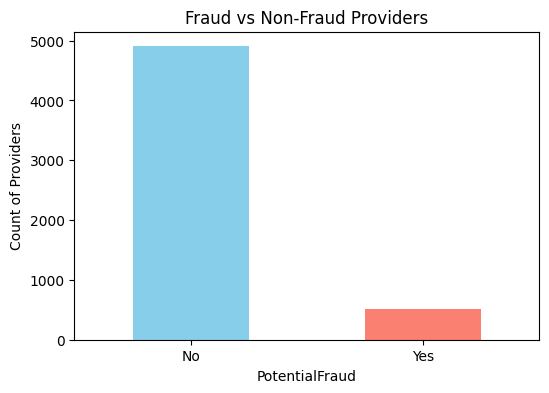

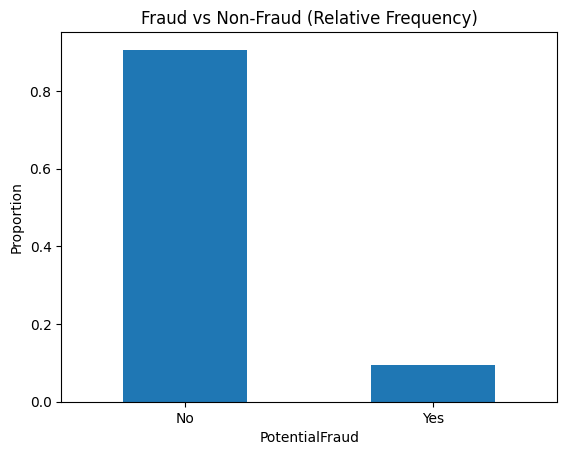

In [8]:
plt.figure(figsize=(6,4))
labels['PotentialFraud'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Fraud vs Non-Fraud Providers")
plt.xlabel("PotentialFraud")
plt.ylabel("Count of Providers")
plt.xticks(rotation=0)
plt.show()
labels['PotentialFraud'].value_counts(normalize=True).plot(kind='bar')
plt.title("Fraud vs Non-Fraud (Relative Frequency)")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

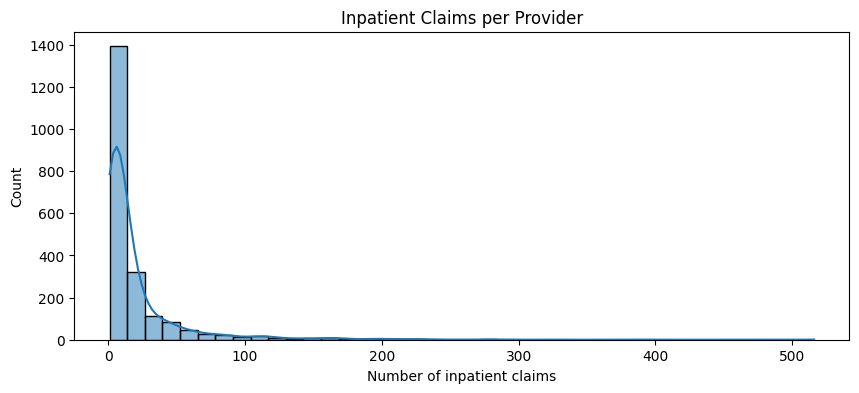

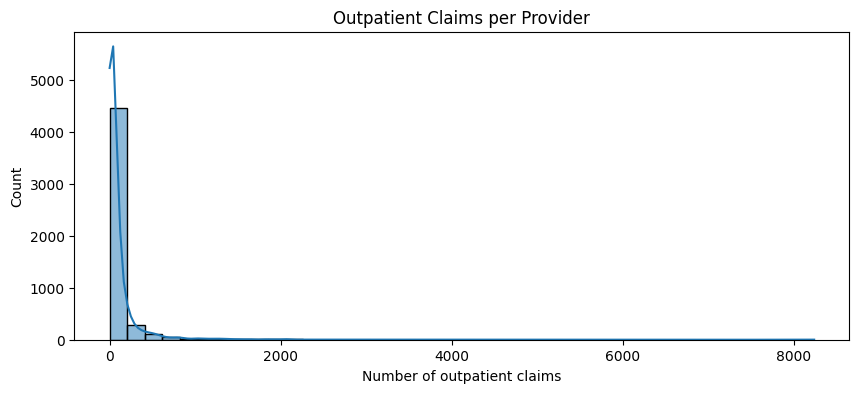

In [9]:
# ============================================================
# Cell 6 – Claim counts per provider (raw claim-level EDA)
# ============================================================
inp_claims_per_provider = inpatient['Provider'].value_counts()
out_claims_per_provider = outpatient['Provider'].value_counts()

plt.figure(figsize=(10,4))
sns.histplot(inp_claims_per_provider, bins=40, kde=True)
plt.title("Inpatient Claims per Provider")
plt.xlabel("Number of inpatient claims")
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(out_claims_per_provider, bins=40, kde=True)
plt.title("Outpatient Claims per Provider")
plt.xlabel("Number of outpatient claims")
plt.show()


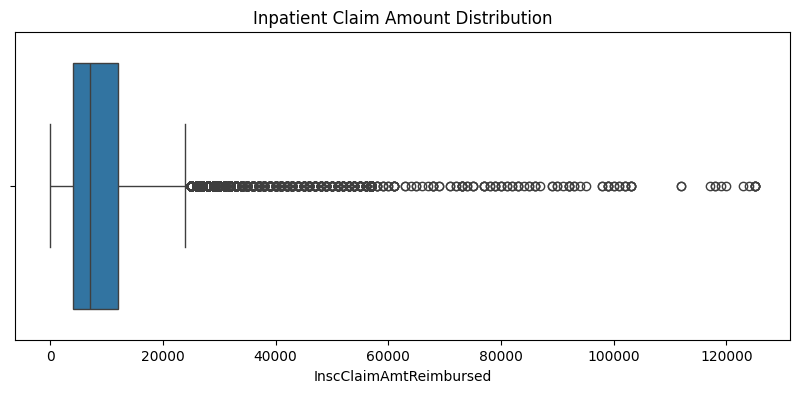

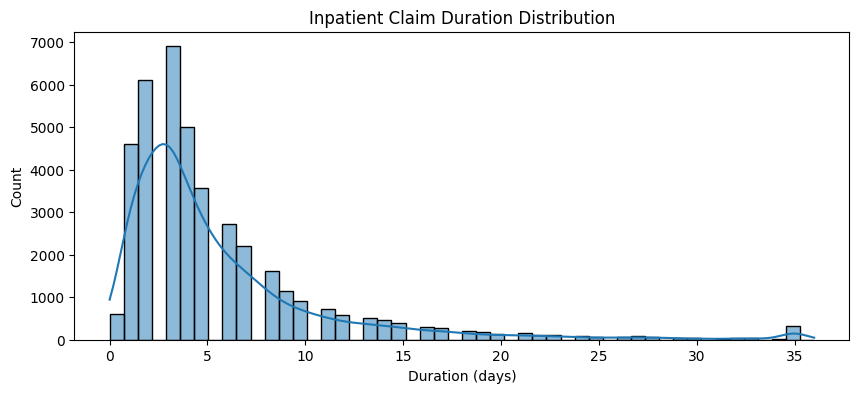

In [10]:
# ============================================================
# Cell 7 – Inpatient reimbursement + duration distributions
# ============================================================
plt.figure(figsize=(10,4))
sns.boxplot(x=inpatient['InscClaimAmtReimbursed'])
plt.title("Inpatient Claim Amount Distribution")
plt.xlabel("InscClaimAmtReimbursed")
plt.show()

# Convert inpatient dates to datetime and compute duration
inpatient['ClaimStartDt'] = pd.to_datetime(inpatient['ClaimStartDt'])
inpatient['ClaimEndDt'] = pd.to_datetime(inpatient['ClaimEndDt'])
inpatient['ClaimDuration'] = (inpatient['ClaimEndDt'] - inpatient['ClaimStartDt']).dt.days

plt.figure(figsize=(10,4))
sns.histplot(inpatient['ClaimDuration'], bins=50, kde=True)
plt.title("Inpatient Claim Duration Distribution")
plt.xlabel("Duration (days)")
plt.show()


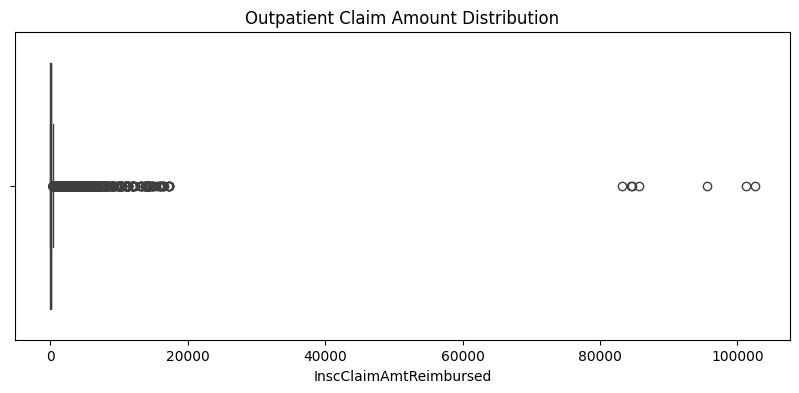

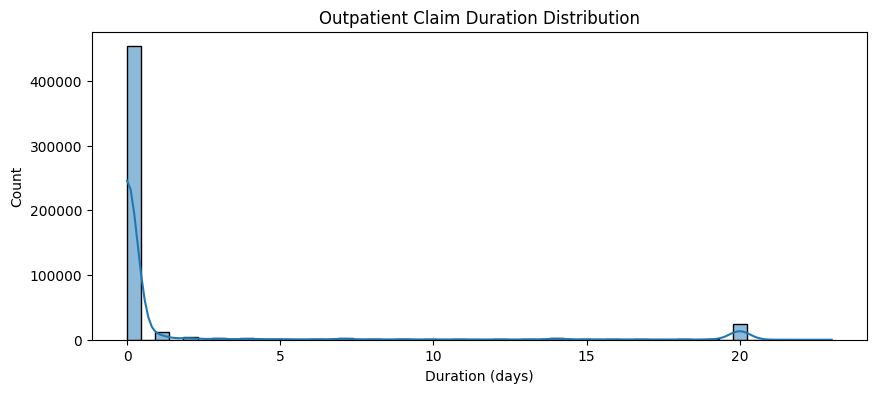

In [11]:
# ============================================================
# Cell 8 – Outpatient reimbursement + duration distributions
# ============================================================
plt.figure(figsize=(10,4))
sns.boxplot(x=outpatient['InscClaimAmtReimbursed'])
plt.title("Outpatient Claim Amount Distribution")
plt.xlabel("InscClaimAmtReimbursed")
plt.show()

outpatient['ClaimStartDt'] = pd.to_datetime(outpatient['ClaimStartDt'], errors='coerce')
outpatient['ClaimEndDt'] = pd.to_datetime(outpatient['ClaimEndDt'], errors='coerce')
outpatient.dropna(subset=['ClaimStartDt', 'ClaimEndDt'], inplace=True)
outpatient['ClaimDuration'] = (outpatient['ClaimEndDt'] - outpatient['ClaimStartDt']).dt.days

plt.figure(figsize=(10,4))
sns.histplot(outpatient['ClaimDuration'], bins=50, kde=True)
plt.title("Outpatient Claim Duration Distribution")
plt.xlabel("Duration (days)")
plt.show()


In [12]:
inpatient_agg = inpatient.groupby('Provider').agg({
    'InscClaimAmtReimbursed': 'sum',
    'DeductibleAmtPaid': 'sum',
    'ClaimDuration': 'mean',
    'ClaimID': 'count'
}).reset_index()

inpatient_agg.rename(columns={'ClaimID':'InpatientClaimCount'}, inplace=True)
display(inpatient_agg.head())
display(inpatient_agg.describe())


,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimDuration,InpatientClaimCount
0,PRV51001,97000,5340.0,5.000000,5
1,PRV51003,573000,66216.0,5.161290,62
2,PRV51007,19000,3204.0,5.333333,3
3,PRV51008,25000,2136.0,4.000000,2
4,PRV51011,5000,1068.0,5.000000,1


,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimDuration,InpatientClaimCount
count,2.092000e+03,2092.000000,2092.000000,2092.000000
mean,1.951707e+05,20203.680688,5.660601,19.347036
std,3.579631e+05,36553.781412,2.756483,34.983155
min,0.000000e+00,0.000000,0.000000,1.000000
25%,2.900000e+04,3204.000000,4.132258,3.000000
50%,7.700000e+04,8544.000000,5.333333,8.000000
75%,1.880000e+05,19224.000000,6.500000,19.000000
max,5.580870e+06,536136.000000,35.000000,516.000000


In [13]:
outpatient['ClaimStartDt'] = pd.to_datetime(outpatient['ClaimStartDt'], errors='coerce')
outpatient['ClaimEndDt'] = pd.to_datetime(outpatient['ClaimEndDt'], errors='coerce')

# Drop rows where ClaimStartDt or ClaimEndDt became NaT due to errors
outpatient.dropna(subset=['ClaimStartDt', 'ClaimEndDt'], inplace=True)

outpatient['ClaimDuration'] = (outpatient['ClaimEndDt'] - outpatient['ClaimStartDt']).dt.days

outpatient_agg = outpatient.groupby('Provider').agg({
    'InscClaimAmtReimbursed': 'sum',
    'DeductibleAmtPaid': 'sum',
    'ClaimDuration': 'mean',
    'ClaimID': 'count'
}).reset_index()

outpatient_agg.rename(columns={'ClaimID':'OutpatientClaimCount'}, inplace=True)
display(outpatient_agg.head())
display(outpatient_agg.describe())

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimDuration,OutpatientClaimCount
0,PRV51001,7640,0,0.550000,20
1,PRV51003,32670,70,2.357143,70
2,PRV51004,52170,310,1.429530,149
3,PRV51005,280910,3700,1.088412,1165
4,PRV51007,14710,60,0.768116,69


,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimDuration,OutpatientClaimCount
count,5.012000e+03,5012.000000,5012.000000,5012.000000
mean,2.957824e+04,287.093376,1.371911,103.299481
std,7.873801e+04,780.290429,1.400486,275.481109
min,0.000000e+00,0.000000,0.000000,1.000000
25%,2.587500e+03,0.000000,0.519240,11.000000
50%,8.695000e+03,80.000000,1.259808,31.000000
75%,2.475500e+04,270.000000,1.777215,85.000000
max,2.321890e+06,22790.000000,20.000000,8240.000000
